In [1]:
import sys
sys.path.append('../')

**Import Module**

In [2]:
import torch.nn as nn
from torchvision import models
import timm

from models.trainer import Trainer
from datasets.data_manager import DataManager
from models.transform_manager import TransformManager
from models.model_manager import ModelManager
from models.training_manager import TrainingManager
from models.test_manager import TestManager

from results.metrics_visualizer import MetricsVisualizer
from results.metrics_calculator import MetricsCalculator
from results.plot_visualizer import PlotVisualizer
from results.heatmap_generator import HeatmapGenerator

**Define Model Class**

In [3]:
class MobileNetV2MultiLabel(nn.Module):

    def __init__(self, num_classes):
        super(MobileNetV2MultiLabel, self).__init__()
        self.model = models.mobilenet_v2(pretrained=True)

        num_ftrs = self.model.classifier[1].in_features

        self.model.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(num_ftrs, num_classes)
        )

    def forward(self, x):
        return self.model(x)

**Define Model Name & Initialize Model Class**

In [16]:
modelName = "MobileNetV2"
MODEL = MobileNetV2MultiLabel

**Constants**

In [6]:
BATCH_SIZE = 64
LEARNING_RATE = 1e-4
SIZE = 224
FOLD_SPLITS=2
EPOCHS = 30
DEVICE = "cuda"
WEIGHT_DECAY = 1e-5
OPTIMIZER_TYPE = "RAdam"

MAIN_CSV_FILE = "../final_label.csv"
LABEL_COLS = ["Fracture", "CalvarialFracture", "OtherFracture"]
DATASET_PATH = "../Dataset_PNG"
TEST_CSV_FILE = "../test_fold.csv"

MODEL_SAVE_PATH = f"./models/{modelName}"
TRAINING_VALIDATION_PLOT_SAVE_PATH = f"./results/{modelName}"
PLOT_SAVE_PATH = f"./results/{modelName}"
GRADCAM_HEATMAP_SAVE_PATH = f"./results/{modelName}"
CAM_OUTPUT_SIZE = 512

***Initialize necessary modules***

In [7]:
data_manager = DataManager(MAIN_CSV_FILE, LABEL_COLS, FOLD_SPLITS)

transform_manager = TransformManager(DATASET_PATH, SIZE, BATCH_SIZE)

model_manager = ModelManager(LABEL_COLS, DEVICE, MODEL_SAVE_PATH, MODEL, LEARNING_RATE, WEIGHT_DECAY, OPTIMIZER_TYPE)

training_manager = TrainingManager(data_manager, transform_manager, model_manager, EPOCHS)

***Begin training***

In [8]:
training_manager.run_training()

Processing Folds:   0%|          | 0/2 [00:00<?, ?it/s]

Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 1/30 - Train Loss: 47.2132, Train Accuracy: 0.6810, Val Loss: 35.2317, Val Accuracy: 0.8487


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 2/30 - Train Loss: 24.9448, Train Accuracy: 0.8926, Val Loss: 15.7253, Val Accuracy: 0.9362


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 3/30 - Train Loss: 12.7382, Train Accuracy: 0.9481, Val Loss: 9.2810, Val Accuracy: 0.9684


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 4/30 - Train Loss: 6.8577, Train Accuracy: 0.9780, Val Loss: 5.0572, Val Accuracy: 0.9818


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 5/30 - Train Loss: 3.4246, Train Accuracy: 0.9911, Val Loss: 3.4308, Val Accuracy: 0.9892


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 6/30 - Train Loss: 2.3009, Train Accuracy: 0.9947, Val Loss: 3.8006, Val Accuracy: 0.9840


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 7/30 - Train Loss: 1.4920, Train Accuracy: 0.9960, Val Loss: 2.1069, Val Accuracy: 0.9925


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 8/30 - Train Loss: 1.3918, Train Accuracy: 0.9971, Val Loss: 1.6116, Val Accuracy: 0.9949


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 9/30 - Train Loss: 0.6880, Train Accuracy: 0.9989, Val Loss: 1.6016, Val Accuracy: 0.9940


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 10/30 - Train Loss: 0.7746, Train Accuracy: 0.9985, Val Loss: 2.0517, Val Accuracy: 0.9919


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 11/30 - Train Loss: 0.4441, Train Accuracy: 0.9995, Val Loss: 1.2736, Val Accuracy: 0.9950


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 12/30 - Train Loss: 0.2675, Train Accuracy: 1.0000, Val Loss: 1.2820, Val Accuracy: 0.9952


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 13/30 - Train Loss: 0.2674, Train Accuracy: 0.9998, Val Loss: 1.5415, Val Accuracy: 0.9939


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 14/30 - Train Loss: 0.3178, Train Accuracy: 0.9990, Val Loss: 1.5092, Val Accuracy: 0.9947


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 15/30 - Train Loss: 0.8276, Train Accuracy: 0.9979, Val Loss: 1.2026, Val Accuracy: 0.9958


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 16/30 - Train Loss: 0.2563, Train Accuracy: 0.9997, Val Loss: 1.0791, Val Accuracy: 0.9960


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 17/30 - Train Loss: 0.7095, Train Accuracy: 0.9969, Val Loss: 3.8199, Val Accuracy: 0.9841


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 18/30 - Train Loss: 3.9038, Train Accuracy: 0.9826, Val Loss: 1.5405, Val Accuracy: 0.9949


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 19/30 - Train Loss: 1.4252, Train Accuracy: 0.9946, Val Loss: 1.5761, Val Accuracy: 0.9937


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 20/30 - Train Loss: 0.2893, Train Accuracy: 0.9996, Val Loss: 1.0052, Val Accuracy: 0.9960


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 21/30 - Train Loss: 0.1262, Train Accuracy: 1.0000, Val Loss: 1.0384, Val Accuracy: 0.9960


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 22/30 - Train Loss: 0.2084, Train Accuracy: 0.9989, Val Loss: 1.2233, Val Accuracy: 0.9955


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 23/30 - Train Loss: 0.5974, Train Accuracy: 0.9980, Val Loss: 1.0125, Val Accuracy: 0.9958


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 24/30 - Train Loss: 0.1181, Train Accuracy: 1.0000, Val Loss: 0.9407, Val Accuracy: 0.9959


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 25/30 - Train Loss: 0.0838, Train Accuracy: 1.0000, Val Loss: 0.9424, Val Accuracy: 0.9963


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 26/30 - Train Loss: 0.0884, Train Accuracy: 0.9995, Val Loss: 1.0926, Val Accuracy: 0.9961


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 27/30 - Train Loss: 0.2072, Train Accuracy: 0.9994, Val Loss: 1.1044, Val Accuracy: 0.9967


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 28/30 - Train Loss: 0.0712, Train Accuracy: 0.9999, Val Loss: 0.9913, Val Accuracy: 0.9963


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 29/30 - Train Loss: 0.0783, Train Accuracy: 0.9999, Val Loss: 0.9190, Val Accuracy: 0.9965


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 30/30 - Train Loss: 1.0058, Train Accuracy: 0.9954, Val Loss: 3.5337, Val Accuracy: 0.9854


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 1/30 - Train Loss: 48.6724, Train Accuracy: 0.6451, Val Loss: 36.4732, Val Accuracy: 0.8361


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 2/30 - Train Loss: 25.2063, Train Accuracy: 0.8984, Val Loss: 17.6819, Val Accuracy: 0.9231


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 3/30 - Train Loss: 12.8365, Train Accuracy: 0.9467, Val Loss: 10.0311, Val Accuracy: 0.9604


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 4/30 - Train Loss: 6.9830, Train Accuracy: 0.9771, Val Loss: 5.7127, Val Accuracy: 0.9807


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 5/30 - Train Loss: 3.7878, Train Accuracy: 0.9899, Val Loss: 3.7489, Val Accuracy: 0.9856


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 6/30 - Train Loss: 2.2730, Train Accuracy: 0.9941, Val Loss: 2.9068, Val Accuracy: 0.9900


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 7/30 - Train Loss: 1.3277, Train Accuracy: 0.9977, Val Loss: 2.0492, Val Accuracy: 0.9919


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 8/30 - Train Loss: 0.8072, Train Accuracy: 0.9987, Val Loss: 1.6840, Val Accuracy: 0.9938


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 9/30 - Train Loss: 0.5355, Train Accuracy: 0.9995, Val Loss: 1.7243, Val Accuracy: 0.9929


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 10/30 - Train Loss: 0.7868, Train Accuracy: 0.9982, Val Loss: 8.7152, Val Accuracy: 0.9547


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 11/30 - Train Loss: 1.9191, Train Accuracy: 0.9933, Val Loss: 2.3527, Val Accuracy: 0.9897


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 12/30 - Train Loss: 1.5679, Train Accuracy: 0.9949, Val Loss: 1.2923, Val Accuracy: 0.9955


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 13/30 - Train Loss: 0.8063, Train Accuracy: 0.9977, Val Loss: 1.1138, Val Accuracy: 0.9956


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 14/30 - Train Loss: 0.5772, Train Accuracy: 0.9985, Val Loss: 0.9074, Val Accuracy: 0.9961


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 15/30 - Train Loss: 0.2381, Train Accuracy: 0.9999, Val Loss: 1.0700, Val Accuracy: 0.9952


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 16/30 - Train Loss: 0.2578, Train Accuracy: 0.9991, Val Loss: 1.1730, Val Accuracy: 0.9951


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 17/30 - Train Loss: 0.8141, Train Accuracy: 0.9973, Val Loss: 1.3653, Val Accuracy: 0.9948


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 18/30 - Train Loss: 0.6777, Train Accuracy: 0.9973, Val Loss: 1.0244, Val Accuracy: 0.9953


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 19/30 - Train Loss: 0.1169, Train Accuracy: 1.0000, Val Loss: 0.8578, Val Accuracy: 0.9961


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 20/30 - Train Loss: 0.1670, Train Accuracy: 0.9995, Val Loss: 0.9677, Val Accuracy: 0.9959


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 21/30 - Train Loss: 0.8095, Train Accuracy: 0.9969, Val Loss: 1.2520, Val Accuracy: 0.9950


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 22/30 - Train Loss: 0.8301, Train Accuracy: 0.9973, Val Loss: 1.2094, Val Accuracy: 0.9943


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 23/30 - Train Loss: 0.1270, Train Accuracy: 0.9999, Val Loss: 0.8551, Val Accuracy: 0.9963


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 24/30 - Train Loss: 0.0923, Train Accuracy: 1.0000, Val Loss: 0.9785, Val Accuracy: 0.9958


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 25/30 - Train Loss: 0.0929, Train Accuracy: 0.9999, Val Loss: 1.2463, Val Accuracy: 0.9951


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 26/30 - Train Loss: 0.1094, Train Accuracy: 0.9998, Val Loss: 0.8772, Val Accuracy: 0.9963


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 27/30 - Train Loss: 0.0454, Train Accuracy: 1.0000, Val Loss: 0.8066, Val Accuracy: 0.9967


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 28/30 - Train Loss: 0.0894, Train Accuracy: 0.9997, Val Loss: 1.5225, Val Accuracy: 0.9942


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 29/30 - Train Loss: 0.2888, Train Accuracy: 0.9992, Val Loss: 0.9630, Val Accuracy: 0.9965


Processing Training Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Processing Validation Folds:   0%|          | 0/78 [00:00<?, ?it/s]

Epoch 30/30 - Train Loss: 0.0656, Train Accuracy: 0.9999, Val Loss: 0.8495, Val Accuracy: 0.9965


***Show Training vs Validation Plot***

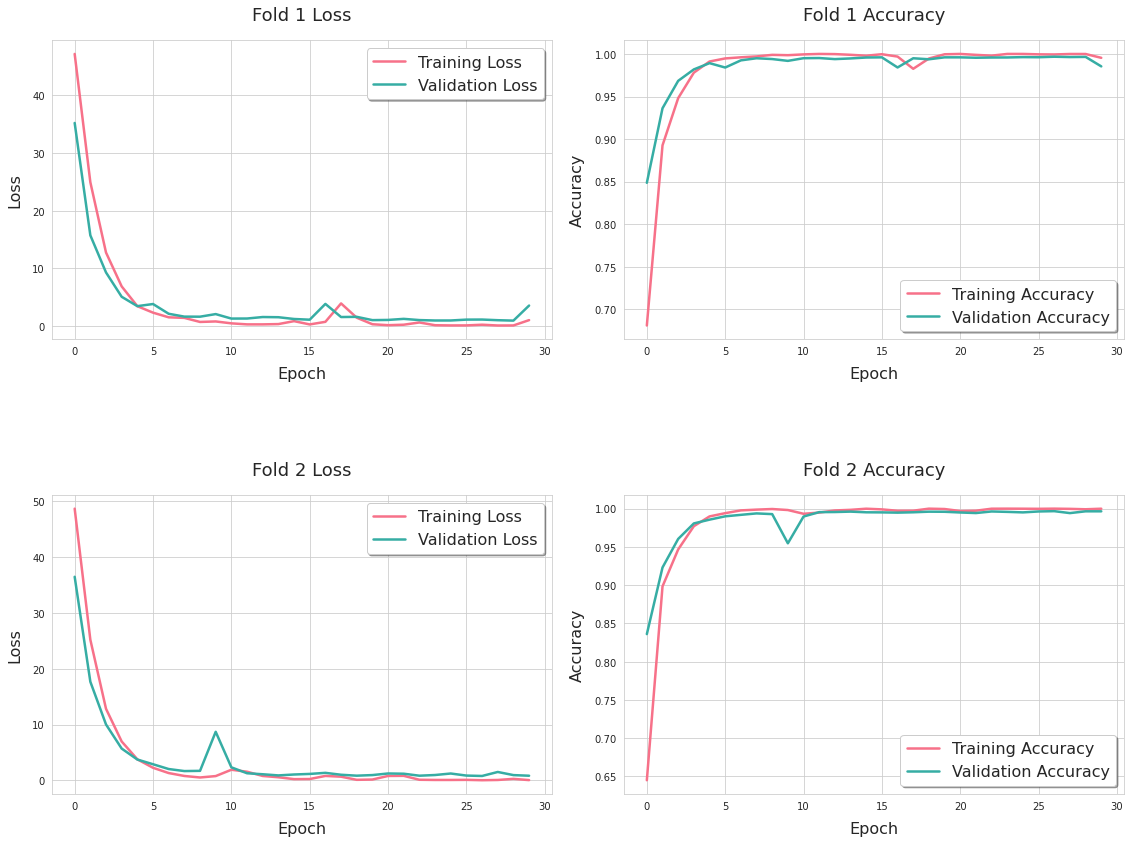

In [9]:
visualizer = MetricsVisualizer(training_manager.train_losses, training_manager.val_losses, training_manager.train_accuracies, training_manager.val_accuracies, TRAINING_VALIDATION_PLOT_SAVE_PATH)
visualizer.plot_metrics()


***Begin Inference***

In [11]:
model_predictor = TestManager(DATASET_PATH, TEST_CSV_FILE, LABEL_COLS, SIZE, MODEL, DEVICE, MODEL_SAVE_PATH, FOLD_SPLITS)

predictions, true_labels, probabilities = model_predictor.make_predictions()

Processing Folds:   0%|          | 0/2 [00:00<?, ?it/s]

Processing Prediction:   0%|          | 0/2468 [00:00<?, ?it/s]

Processing Prediction:   0%|          | 0/2468 [00:00<?, ?it/s]

***Compute and Display Metrics***

In [12]:
metrics_calculator = MetricsCalculator(LABEL_COLS)

aggregated_metrics, metrics_per_class, classification_reports, multi_label_report = metrics_calculator.compute_metrics(predictions[0], true_labels[0])
metrics_calculator.display_metrics(aggregated_metrics, metrics_per_class, classification_reports, multi_label_report)


Aggregated Metrics:
{'accuracy': 0.9837925445705024, 'f1_score': 0.9721857545533638, 'specificity': 0.9957524471330595, 'sensitivity': 0.9623421803496215}

Class-wise Metrics:

Fracture:
{'accuracy': 0.9829821717990276, 'f1_score': 0.9798270893371758, 'specificity': 1.0, 'sensitivity': 0.96045197740113}

CalvarialFracture:
{'accuracy': 0.9841977309562399, 'f1_score': 0.9796344647519584, 'specificity': 0.9986604152712659, 'sensitivity': 0.9620512820512821}

OtherFracture:
{'accuracy': 0.9841977309562399, 'f1_score': 0.9570957095709571, 'specificity': 0.9885969261279127, 'sensitivity': 0.9645232815964523}

Classification Reports Per Class:

Fracture:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1406
         1.0       1.00      0.96      0.98      1062

    accuracy                           0.98      2468
   macro avg       0.99      0.98      0.98      2468
weighted avg       0.98      0.98      0.98      2468


CalvarialFractu

***Display Plots***

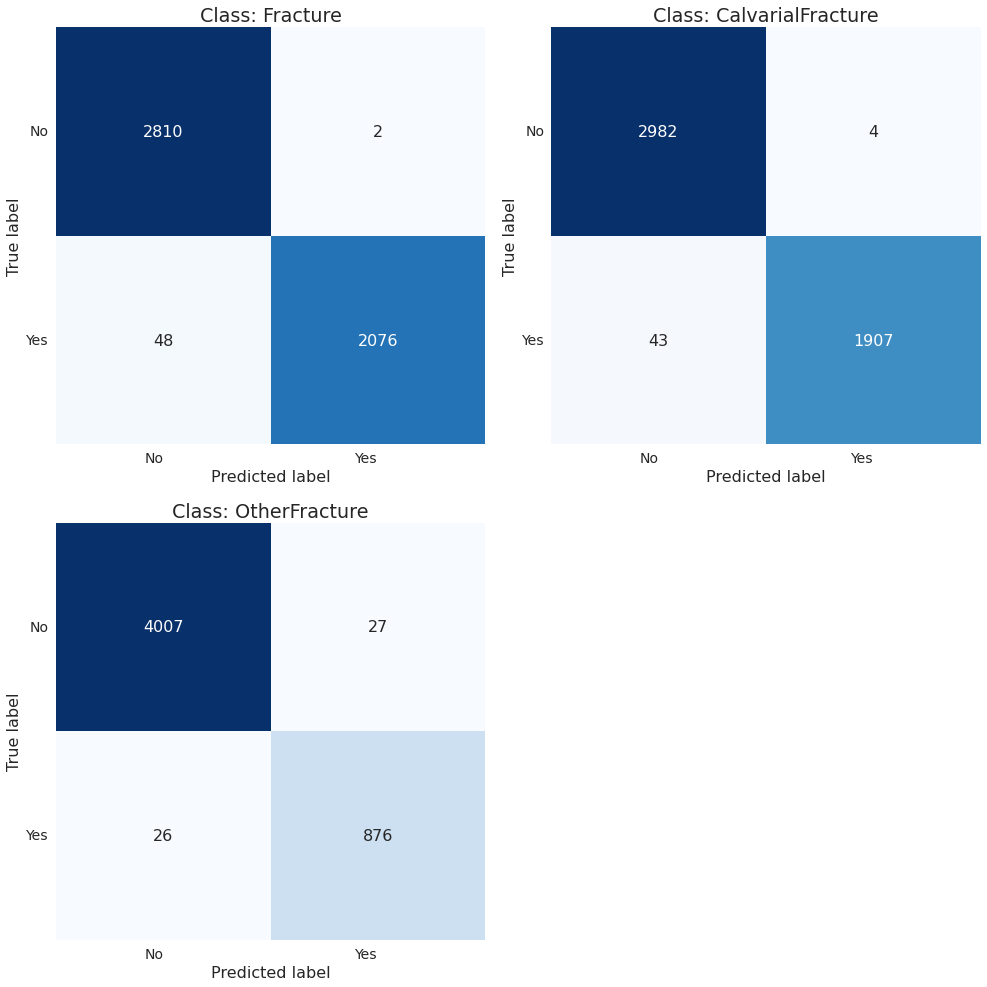

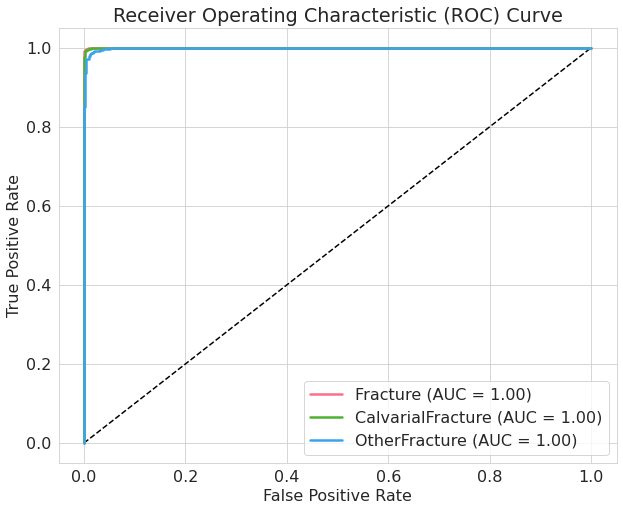

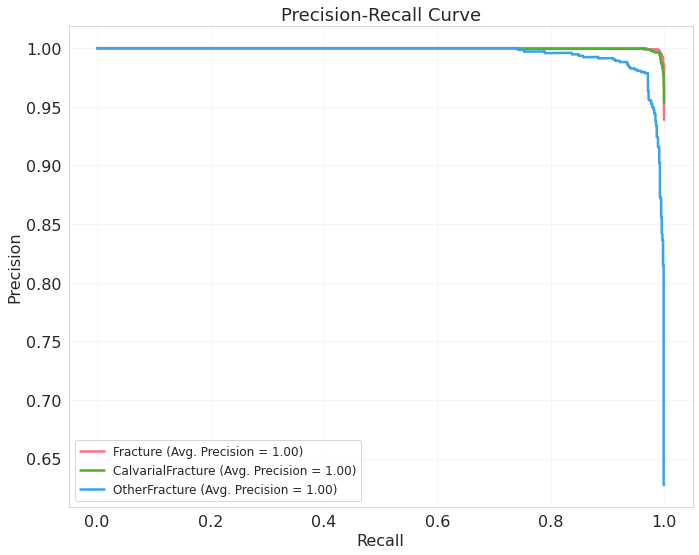

In [14]:
plot_visualizer = PlotVisualizer(LABEL_COLS, PLOT_SAVE_PATH)
plot_visualizer.plot_multilabel_confusion_matrix(true_labels, predictions)
plot_visualizer.plot_roc_curve(true_labels, probabilities)
plot_visualizer.plot_precision_recall_curve(true_labels, probabilities)

***GRADCAM HeatMap Generation***

In [25]:
# # Sample reload example


# import results.heatmap_generator
# import importlib
# importlib.reload(results.heatmap_generator)
# from results.heatmap_generator import HeatmapGenerator
# generator = HeatmapGenerator(model_predictor, TEST_CSV_FILE, MODEL, SIZE, DATASET_PATH, CAM_OUTPUT_SIZE, GRADCAM_HEATMAP_SAVE_PATH, modelName)

# generator.plot_heatmaps()


In [27]:
generator = HeatmapGenerator(model_predictor, TEST_CSV_FILE, MODEL, SIZE, DATASET_PATH, CAM_OUTPUT_SIZE, GRADCAM_HEATMAP_SAVE_PATH, modelName)

generator.plot_heatmaps()